<a href="https://colab.research.google.com/github/karthik154/ccfdetect/blob/master/karthik/backgroundanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("The dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataframe has 284807 rows and 31 columns


#sample data

In [5]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108008,70717.0,1.192016,-0.055240,0.713448,-0.029635,-0.717923,-0.727805,-0.213295,-0.092442,0.262737,-0.283720,0.406177,0.786682,0.748529,0.042892,1.404500,-0.013035,-0.005465,-1.057618,-0.462264,-0.036943,-0.068815,-0.147590,0.146586,0.469825,0.019455,0.910710,-0.051690,0.013012,15.37,0
253941,156502.0,-2.602799,-1.186547,0.731713,-2.947630,0.224534,0.155787,-0.537510,-1.672135,-1.597629,0.987552,-1.751593,-1.316976,0.234805,-0.811502,-0.655630,-0.021782,0.148903,-0.343702,-0.012339,-1.617971,0.412947,-2.081564,1.170077,-0.143050,0.756599,-0.510770,0.604165,-0.144470,52.50,0
270651,164191.0,-1.249292,0.337817,-0.723091,-1.174234,1.479457,-1.119225,0.842071,0.051831,-0.130013,-0.908408,0.857386,0.747669,-0.086504,-0.790528,-1.736063,0.950952,-0.300828,0.147656,-1.024485,-0.659300,-0.222508,-0.297963,0.824555,0.654609,-1.166699,-0.283851,-0.198457,-0.123294,1.98,0
128348,78679.0,1.077449,-0.098128,0.414848,0.352648,-0.202249,0.236337,-0.247728,0.275023,-0.034301,0.020875,1.747769,0.610674,-0.970146,0.725540,0.978419,-0.026852,-0.029835,-0.828756,-0.521739,-0.156284,-0.149511,-0.524324,0.177612,-0.316731,-0.033427,0.242877,-0.020898,0.002992,30.98,0
56480,47447.0,-0.745337,-0.090916,0.817571,-2.066888,1.996165,3.839686,-0.382162,1.140799,0.491701,-1.163013,-0.837209,0.067317,-0.273275,-0.542850,-0.812288,0.411372,-0.640073,-0.090943,0.178984,0.109027,-0.182325,-0.597973,-0.087535,1.058750,0.020596,0.795721,0.008312,0.088365,34.66,0


In [6]:

#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:

#leaving non anonymized attributes
pd.set_option('precision',3)
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


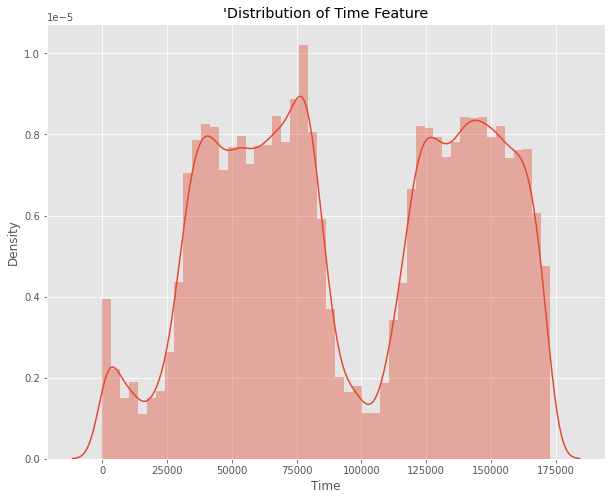

In [8]:

#visualizations of Time
plt.figure(figsize=(10,8))
plt.title("'Distribution of Time Feature")
sns.distplot(df.Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


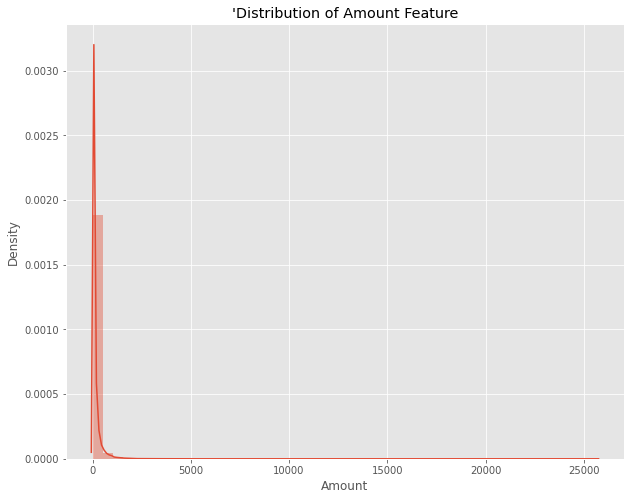

In [9]:
plt.figure(figsize=(10,8))
plt.title("'Distribution of Amount Feature")
sns.distplot(df.Amount)

In [10]:

#no. of fraud and non fraud data points
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

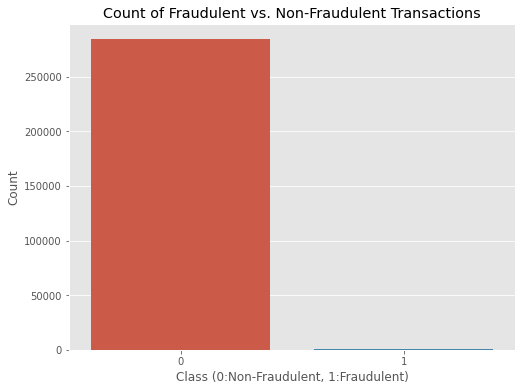

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')